In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [28]:
def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    m, n = X.shape

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * np.dot(X.T,probs * Y)
    return grad,probs


def logistic_regression(X, Y):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad,probs = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
            print('Gradient: ',grad)
            J = -(1/m) * (Y.dot(np.log(probs))) + ((1 - Y).dot(np.log(1 - probs)))
            print(f'Iteration {i}, Cost: {J}')
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return theta


In [29]:
data_a=pd.read_csv('ds1_a.csv')
data_b=pd.read_csv('ds1_b.csv')

In [30]:
intercept=np.ones((data_a.shape[0],1))

In [31]:
x_a=np.append(intercept,np.array(data_a.iloc[:,1:]),axis=1)
x_b=np.append(intercept,np.array(data_b.iloc[:,1:]),axis=1)

In [32]:
y_a=np.array(data_a['y'])
y_b=np.array(data_b['y'])

In [35]:
theta=logistic_regression(x_a,y_a)

Finished 10000 iterations
Gradient:  [ 0.00000004 -0.00000004 -0.00000004]
Iteration 10000, Cost: -14.967554091234609
Finished 20000 iterations
Gradient:  [ 0. -0. -0.]
Iteration 20000, Cost: -14.967559372169237
Finished 30000 iterations
Gradient:  [ 0. -0. -0.]
Iteration 30000, Cost: -14.967559372559224
Converged in 30357 iterations


In [62]:
a=theta[1]
b=theta[2]
line=np.linspace(0,1)


array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [21]:
np.set_printoptions(suppress=True)

In [22]:
logistic_regression(x_b,y_b)

Finished 10000 iterations
Gradient:  [ 0.00019399 -0.00019355 -0.00019461]
Iteration 10000, Cost: -2.1595096338238804
Finished 20000 iterations
Gradient:  [ 0.00012541 -0.00012529 -0.0001257 ]
Iteration 20000, Cost: -1.1969633812927747
Finished 30000 iterations
Gradient:  [ 0.00009604 -0.00009606 -0.0000962 ]
Iteration 30000, Cost: -0.66237090954823
Finished 40000 iterations
Gradient:  [ 0.00007907 -0.00007915 -0.00007914]
Iteration 40000, Cost: -0.2934957603864943
Finished 50000 iterations
Gradient:  [ 0.00006783 -0.00006797 -0.00006787]
Iteration 50000, Cost: -0.011532028189097154
Finished 60000 iterations
Gradient:  [ 0.00005979 -0.00005996 -0.0000598 ]
Iteration 60000, Cost: 0.21745487939239982
Finished 70000 iterations
Gradient:  [ 0.00005372 -0.00005392 -0.00005371]
Iteration 70000, Cost: 0.41100701497106473
Finished 80000 iterations
Gradient:  [ 0.00004896 -0.00004917 -0.00004893]
Iteration 80000, Cost: 0.5792913118114624
Finished 90000 iterations
Gradient:  [ 0.00004511 -0.0000

KeyboardInterrupt: 

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [55]:
def sam(x,y):
    x=np.array(x)
    y=np.array(y)
    x_pos=x[y[:]==1]
    x_neg=x[y[:]==-1]
    x1_pos=x_pos[:,0]
    x1_neg=x_neg[:,0]
    x2_pos=x_pos[:,1]
    x2_neg=x_neg[:,1]
    return x1_pos,x1_neg,x2_pos,x2_neg

In [56]:
x_a=data_a.iloc[:,1:]
y_a=data_a.iloc[:,0]

In [57]:
x1_pos,x1_neg,x2_pos,x2_neg=sam(x_a,y_a)

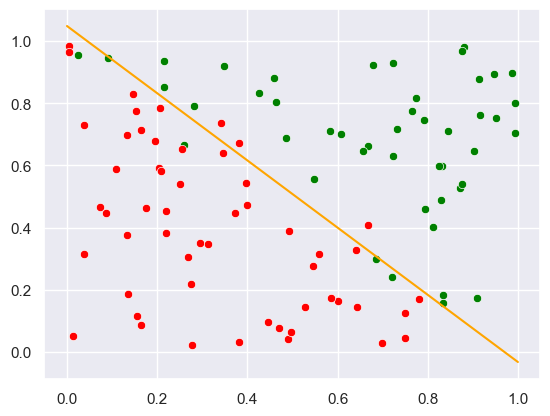

In [79]:
plt.figure()
sns.scatterplot(x=x1_pos,y=x2_pos,color='green')
sns.scatterplot(x=x1_neg,y=x2_neg,color='red')
sns.lineplot(x=line,y=-(a*line+theta[0])/b,color='orange')
plt.show()

In [81]:
x_b=data_b.iloc[:,1:]
y_b=data_b.iloc[:,0]

In [82]:
x1_pos,x1_neg,x2_pos,x2_neg=sam(x_b,y_b)

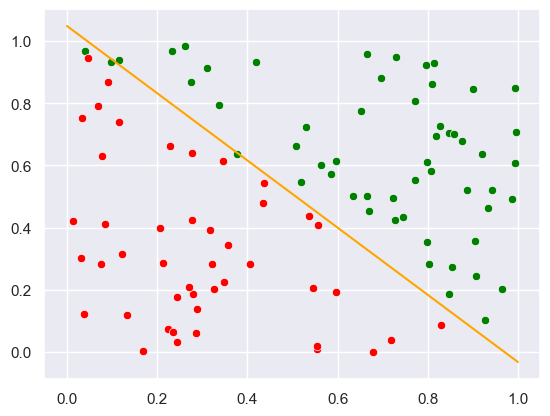

In [84]:
plt.figure()
sns.scatterplot(x=x1_pos,y=x2_pos,color='green')
sns.scatterplot(x=x1_neg,y=x2_neg,color='red')
sns.lineplot(x=line,y=-(a*line+theta[0])/b,color='orange')
plt.show()